In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
#generating synthetic data
np.random.seed(42)
x=np.linspace(0,10,100)+np.random.uniform(-1.5,1.5,100)

In [8]:
#x

In [34]:
y=np.linspace(0,10,100) + np.random.uniform(-1.5,1.5,100)
y

array([ 0.31928718, -1.37139874, -0.99356517,  0.79353561, -1.08077484,
       -0.51252534,  0.75226197,  1.2827563 ,  1.26396459,  0.08189884,
        1.64663867,  0.32285837,  0.68832031,  2.05260553,  1.86304011,
        2.56282175,  2.08900029,  1.92209753,  0.59920612,  1.52233933,
        1.31580912,  1.35318105,  3.64125389,  2.0025255 ,  3.60038209,
        2.9186684 ,  3.51069654,  2.73518401,  3.05899448,  2.90684601,
        2.11603199,  3.79866948,  2.57464032,  1.90628123,  3.87076032,
        2.56668557,  4.95773939,  5.09915947,  5.08297701,  3.54987004,
        2.58677389,  5.42636983,  4.02697669,  5.7433988 ,  5.83530438,
        5.60448291,  4.02981132,  4.40276793,  5.90189486,  4.40026096,
        4.05898329,  5.32191894,  6.56098958,  5.94162474,  5.66472896,
        4.34708504,  6.00158734,  7.22773731,  4.7788379 ,  6.01458492,
        7.19272528,  6.88392201,  6.85367349,  6.97108862,  6.04311992,
        5.9464321 ,  7.59475013,  7.69801695,  7.96990382,  8.20

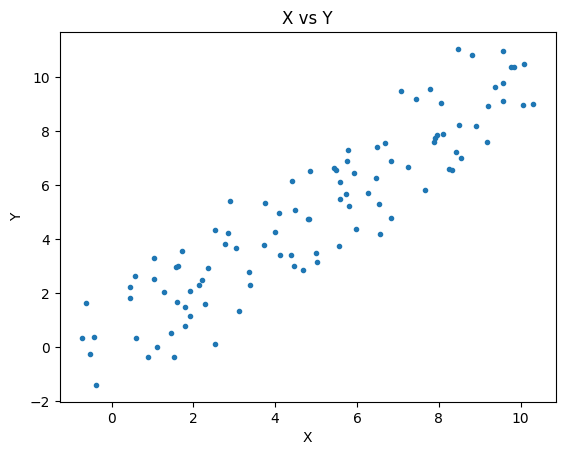

In [20]:
#plt.figure(figsize=(10,6))
plt.xlabel('X')
plt.ylabel('Y')
plt.title("X vs Y")
plt.plot(x,y,'.')
plt.show()

In [22]:
np.random.rand(2)


array([0.16162871, 0.89855419])

In [23]:
m=tf.Variable(0.161)
b=tf.Variable(0.898)

In [24]:
def linear_regression(x):
    return m*x+b

In [25]:
#cost function 
def mean_squared_error(y_true,y_predict):
    return tf.reduce_mean(tf.square(y_true-y_predict))

In [26]:
optimizer=tf.optimizers.SGD(learning_rate=0.01)

In [27]:
batch_size=10
epoch=100

In [29]:
for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y_predicted=linear_regression(x)
        loss=mean_squared_error(y,y_predicted)
    gradients=tape.gradient(loss,[m,b])
    optimizer.apply_gradients(zip(gradients,[m,b]))
    if (epoch+1)%20==0:
        print(f"Epoch {epoch+1}, loss:{loss.numpy()}")

Epoch 20, loss:1.6327004432678223
Epoch 40, loss:1.6182345151901245
Epoch 60, loss:1.606627345085144
Epoch 80, loss:1.5973135232925415


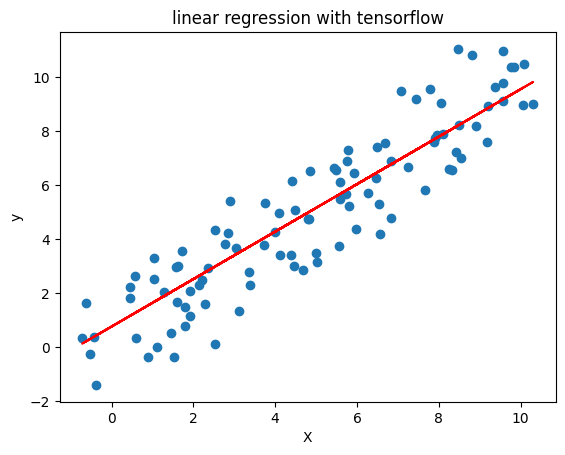

In [30]:
plt.scatter(x,y,label='data points')
plt.plot(x,linear_regression(x),color='red',label='regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('linear regression with tensorflow')
plt.show()

In [32]:
#predicting y for new values of x
new_x=np.array([[5.0]])
print(linear_regression(new_x))

tf.Tensor([[5.162527]], shape=(1, 1), dtype=float32)


In [33]:
print(linear_regression(x))

tf.Tensor(
[0.4294441  2.0400689  1.551343   1.2881224  0.2080155  0.29687583
 0.12721294 2.350344   1.7392302  2.1106339  0.38387215 2.9800053
 2.7058725  1.1570764  1.1654112  1.2585068  1.6665685  2.33788
 2.181685   1.8989724  2.8346777  1.676081   2.1681623  2.453097
 2.778944   3.737051   2.2796388  3.1993313  3.494732   2.1417413
 3.7125401  2.6472733  2.4576397  4.880807   5.0139594  4.6876197
 3.4460297  2.988412   4.6264687  4.0707655  3.3195362  4.3939357
 3.2658973  5.665554   4.036373   5.1915975  4.354014   4.9932175
 5.152505   4.2857523  6.4471827  6.0225506  6.5455728  6.516517
 5.8212433  6.7657976  4.6537247  5.026535   4.7173076  5.545995
 5.8022213  5.5812764  7.1422873  5.984681   5.873364   6.6536117
 5.681439   7.516813   5.683991   8.182435   7.704479   6.2786884
 5.8573804  8.085389   7.8874846  8.034907   8.235451   6.482971
 7.3230634  6.771279   8.833681   8.289269   7.605952   6.9888206
 7.7312016  7.8576317  9.014653   8.860473   9.6087475  8.6016445
 7.7